<a href="https://colab.research.google.com/github/kacperob/PUM/blob/main/DENDROGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import geopandas as gpd

# Read the data
countries_df = pd.read_csv('/content/countries of the world.csv')

# List of columns to convert to float
list_to_float = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration',
                 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)',
                 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture',
                 'Industry', 'Service']

# Replace commas with periods and convert to float
countries_df[list_to_float] = countries_df[list_to_float].apply(lambda x: x.str.replace(',', '.'))
countries_df[list_to_float] = countries_df[list_to_float].astype(float)

# Fill NaN values with 0
countries_df.fillna(0, inplace=True)


# Convert 'Climate' column to string
countries_df['Climate'] = countries_df['Climate'].astype(str)

# Label encoding for 'Climate' column
label_encoder = LabelEncoder()
countries_df['Climate'] = label_encoder.fit_transform(countries_df['Climate'])

# Drop non-numeric columns
numeric_df = countries_df.drop(['Country', 'Region'], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

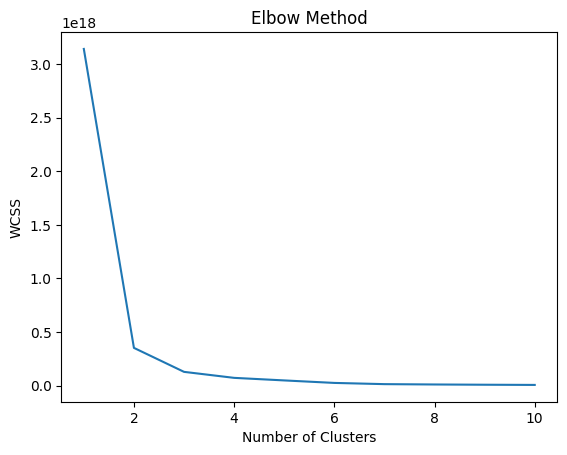

In [20]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numeric_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


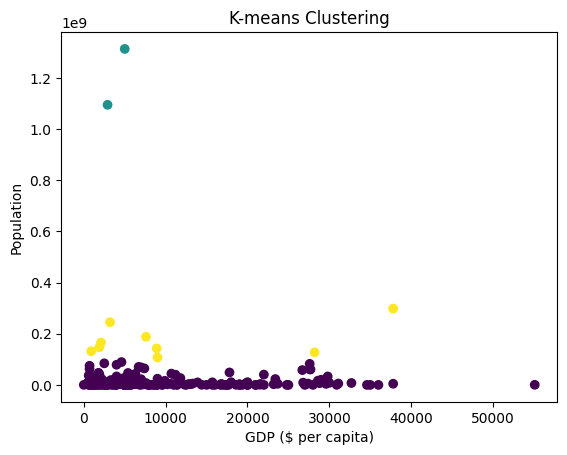

In [21]:
# Choose the optimal number of clusters based on the elbow method
k = 3  # For example, if the elbow is at k=3

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(numeric_df)

# Add cluster labels to the DataFrame
numeric_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(numeric_df['GDP ($ per capita)'], numeric_df['Population'], c=numeric_df['Cluster'], cmap='viridis')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Population')
plt.title('K-means Clustering')
plt.show()

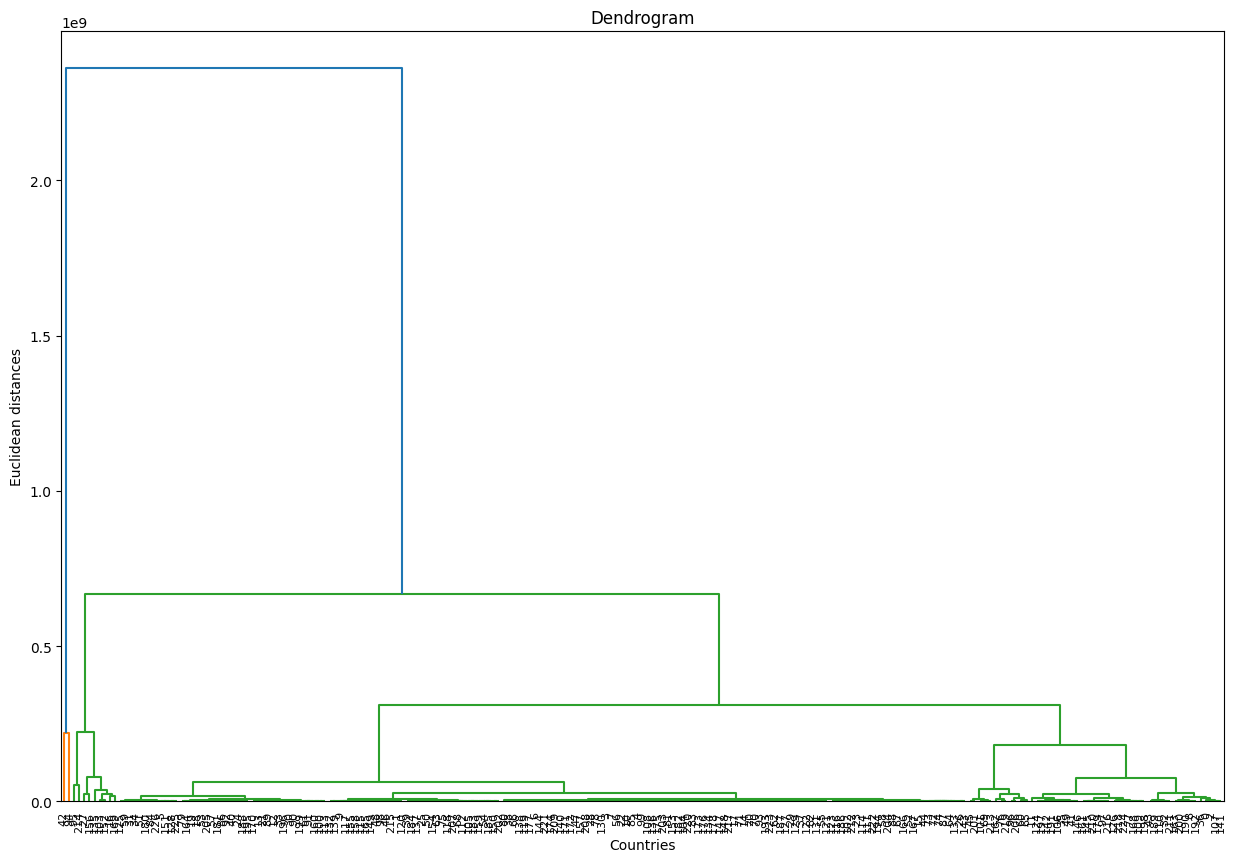

In [22]:
# Perform hierarchical clustering
Z = linkage(numeric_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()